In [1]:
# Library import cell

import numpy as np
import secrets
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import itertools
from scipy.optimize import curve_fit

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

C:\Users\plogo\anaconda3\envs\cnn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Function cell

def generate_random_binary_string(length):
    binary_string = ''.join(secrets.choice(['0', '1']) for _ in range(length))
    return binary_string

def generate_dict(n_tasks, len_taskcode, num_checks, len_message):
    unique_strings = set()
    tasks_dict = {}

    while len(unique_strings) < n_tasks:
        binary_string = generate_random_binary_string(len_taskcode)

        if binary_string not in unique_strings:
            unique_strings.add(binary_string)

            integer_list = [secrets.randbelow(len_message) for _ in range(num_checks)]
            tasks_dict[binary_string] = integer_list

    return tasks_dict

def generate_dataset(tasks_dict, num_samples):
  data = np.zeros((num_samples, len_taskcode + len_message))
  value = np.zeros(num_samples)
  for i in range(num_samples):
    rand_task = np.random.choice(list(tasks_dict))
    rand_checkbits = tasks_dict[rand_task]
    message = generate_random_binary_string(len_message)
    parity_bit = 0
    for j in rand_checkbits:
      parity_bit += int(message[j])
    parity = parity_bit % 2
    data[i] = np.concatenate((np.array(list(rand_task)), np.array(list(message))))
    value[i] = parity
  return [data, value]

def generate_dataset_for_task(task_code, num_samples):
  data = np.zeros((num_samples, len_taskcode + len_message))
  value = np.zeros(num_samples)
  for i in range(num_samples):
    rand_task = task_code
    rand_checkbits = tasks_dict[rand_task]
    message = generate_random_binary_string(len_message)
    parity_bit = 0
    for j in rand_checkbits:
      parity_bit += int(message[j])
    parity = parity_bit % 2
    data[i] = np.concatenate((np.array(list(rand_task)), np.array(list(message))))
    value[i] = parity
  return [data, value]

'''
# Define a NN class WITH BATCH NORMALISATION
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, num_layers, hidden_size):
        super(NeuralNetwork, self).__init__()

        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))  # Additional linear layer
        
        for _ in range(num_layers - 2):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
            self.layers.append(nn.BatchNorm1d(hidden_size))  # Add BatchNorm1d layer
        
        self.layers.append(nn.Linear(hidden_size, output_size))
    
    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            if i == 0:  # Apply ReLU activation only after the additional linear layer
                x = F.relu(layer(x))
            else:
                x = layer(x)
                if i % 2 == 0:
                    x = F.relu(x)  # Apply ReLU activation after each linear layer
        x = self.layers[-1](x)
        return x
'''
# IS NOT USING BATCH NORMALISATION
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, num_layers, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        
        for _ in range(num_layers - 2):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        
        self.layers.append(nn.Linear(hidden_size, output_size))
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
        
        x = self.layers[-1](x)
        return x

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.iloc[:, :-1].values
        self.target = dataframe.iloc[:, -1].values
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = torch.from_numpy(self.data[idx]).float()
        y = torch.tensor(self.target[idx]).float()
        return x, y

tasks_dict =  dict_items([('11110101', [10, 11, 0]), ('10101100', [7, 7, 8])])
1000 samples


100%|██████████| 1000/1000 [06:04<00:00,  2.74it/s]


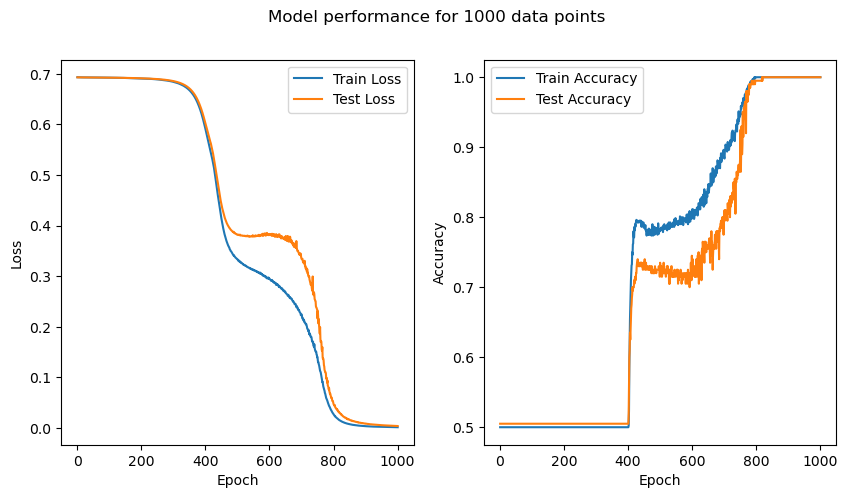

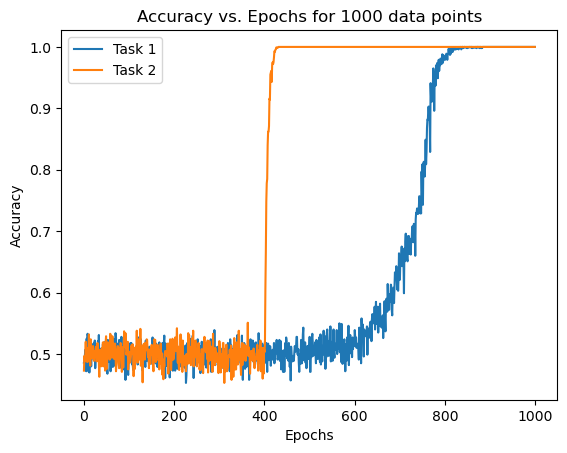

tasks_dict =  dict_items([('10000011', [10, 11, 9]), ('10010110', [11, 1, 11])])
1668 samples


100%|██████████| 1000/1000 [06:41<00:00,  2.49it/s]


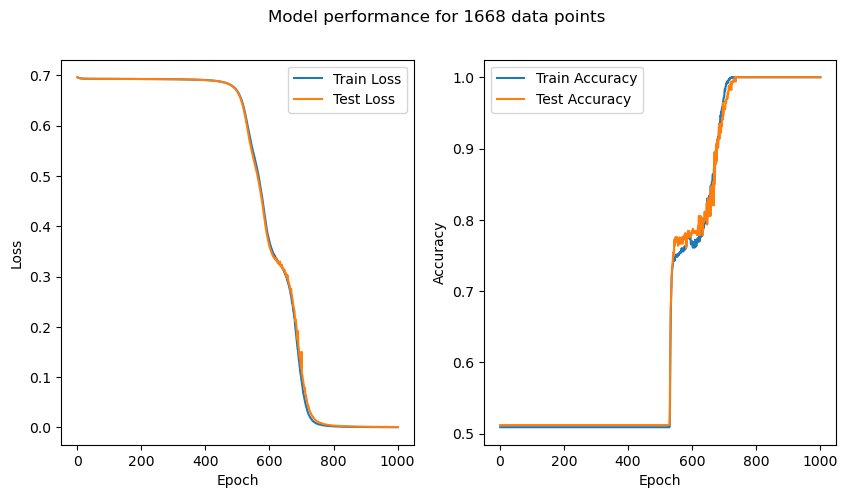

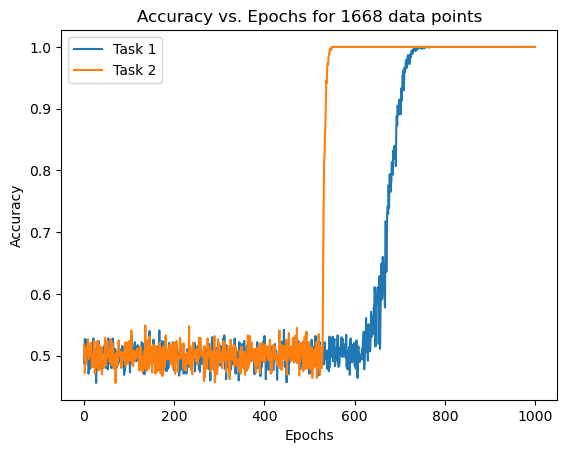

tasks_dict =  dict_items([('01110110', [5, 11, 7]), ('00000111', [1, 3, 1])])
2782 samples


100%|██████████| 1000/1000 [08:13<00:00,  2.03it/s]


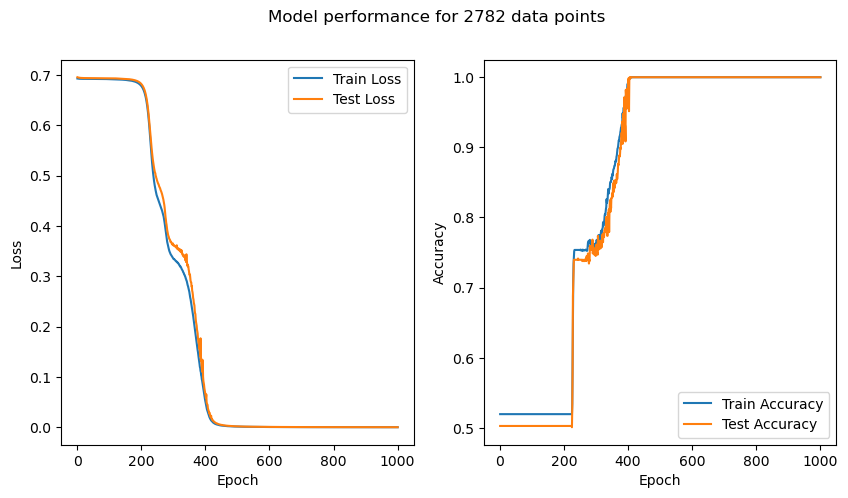

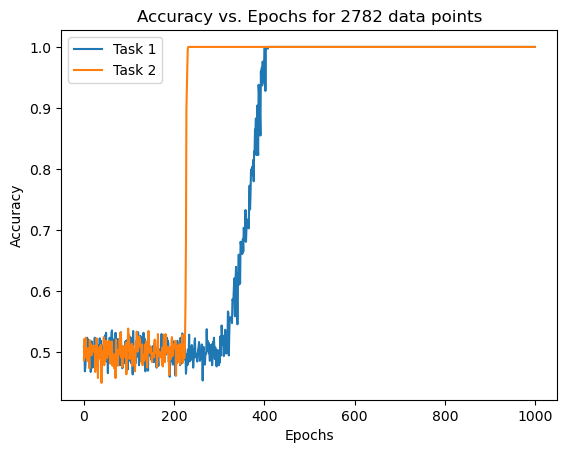

tasks_dict =  dict_items([('10111111', [4, 0, 8]), ('01011000', [7, 8, 3])])
4641 samples


100%|██████████| 1000/1000 [10:39<00:00,  1.56it/s]


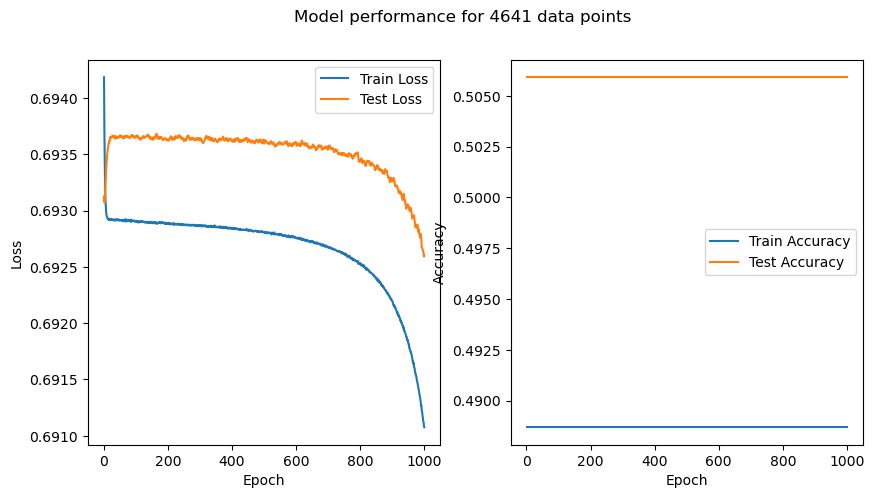

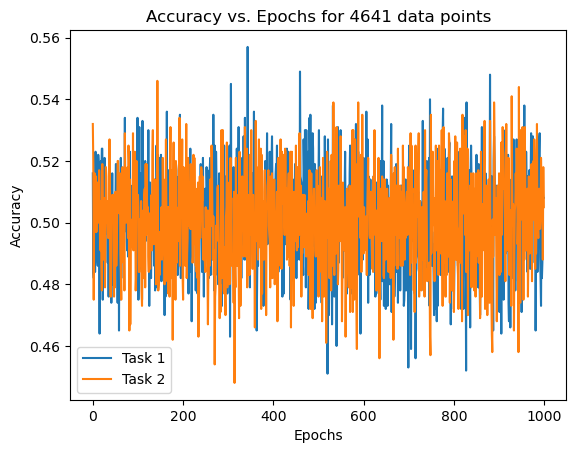

tasks_dict =  dict_items([('01100100', [3, 7, 1]), ('00001110', [2, 2, 8])])
7742 samples


100%|██████████| 1000/1000 [14:46<00:00,  1.13it/s]


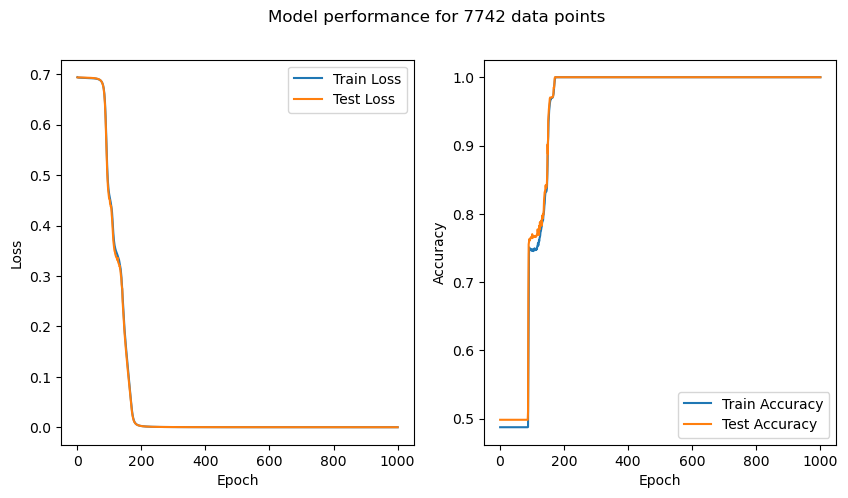

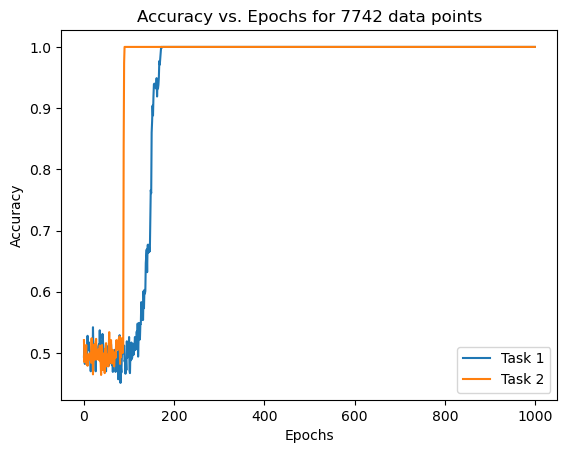

tasks_dict =  dict_items([('01010111', [10, 2, 4]), ('01100100', [2, 7, 3])])
12915 samples


100%|██████████| 1000/1000 [21:42<00:00,  1.30s/it]


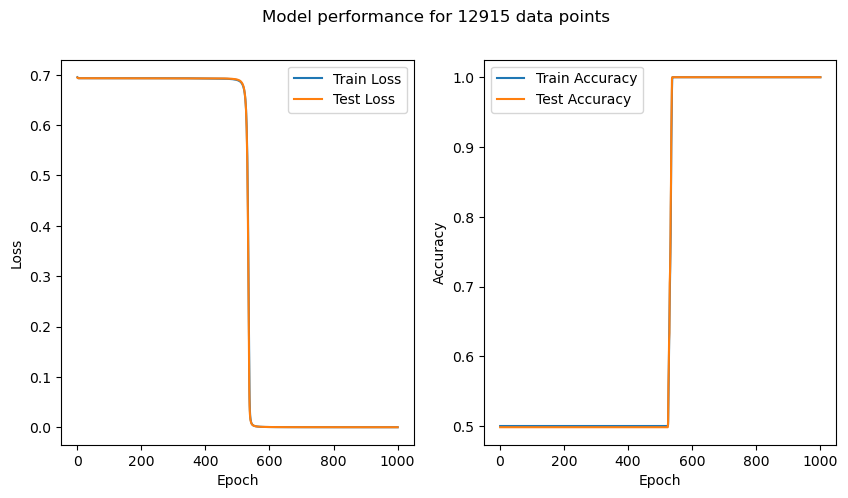

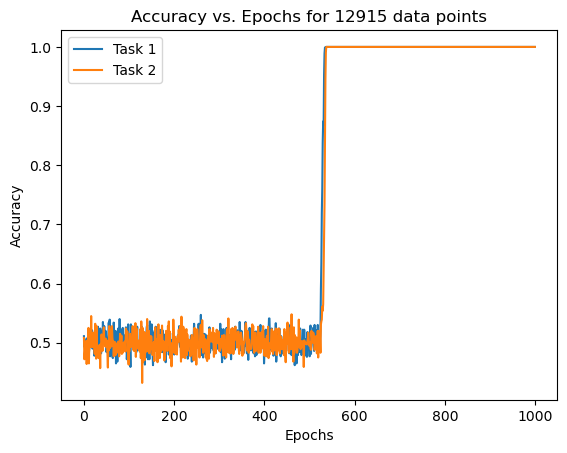

tasks_dict =  dict_items([('10101110', [8, 8, 1]), ('10010011', [4, 6, 1])])
21544 samples


100%|██████████| 1000/1000 [37:21<00:00,  2.24s/it] 


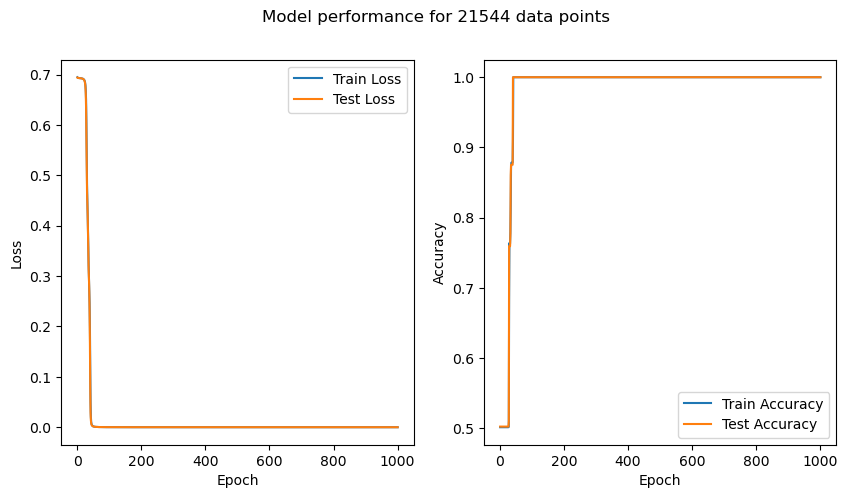

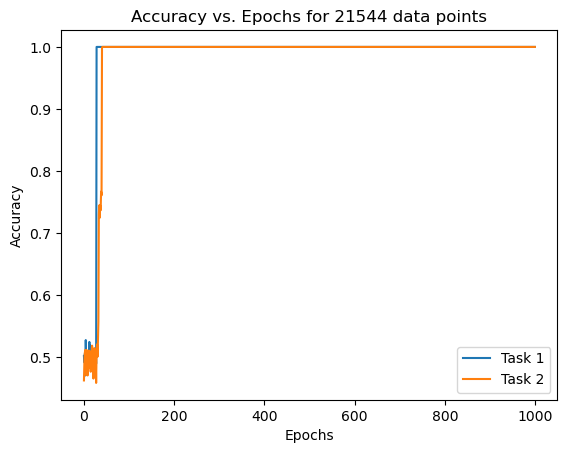

tasks_dict =  dict_items([('10100000', [3, 6, 3]), ('01001101', [9, 5, 5])])
35938 samples


100%|██████████| 1000/1000 [1:30:35<00:00,  5.44s/it]   


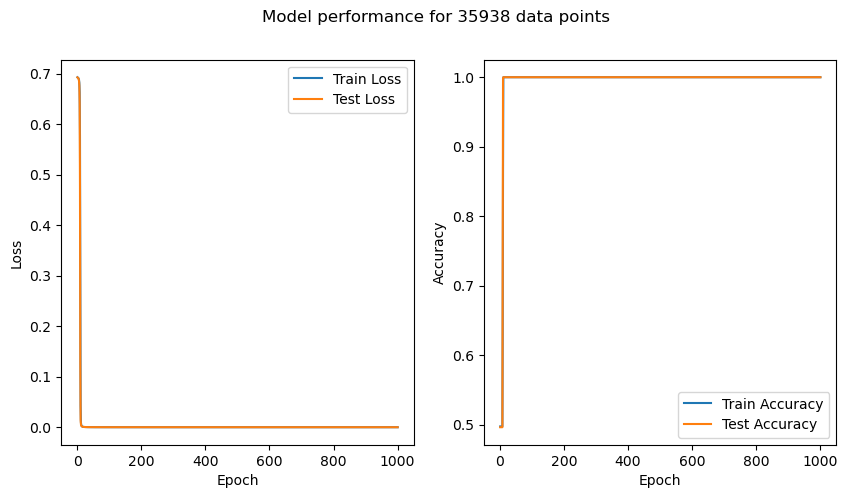

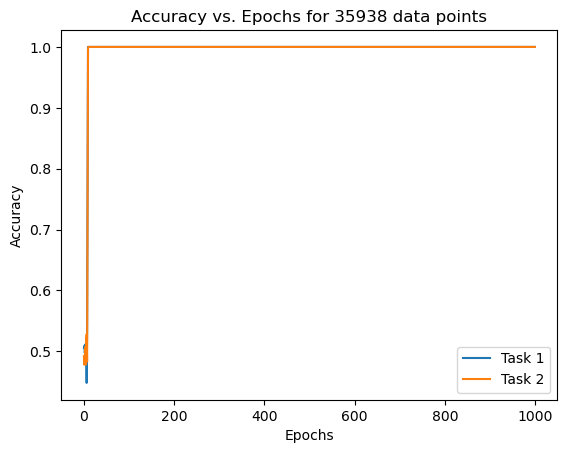

tasks_dict =  dict_items([('01111001', [10, 3, 3]), ('00000000', [2, 6, 9])])
59948 samples


100%|██████████| 1000/1000 [1:24:44<00:00,  5.08s/it]


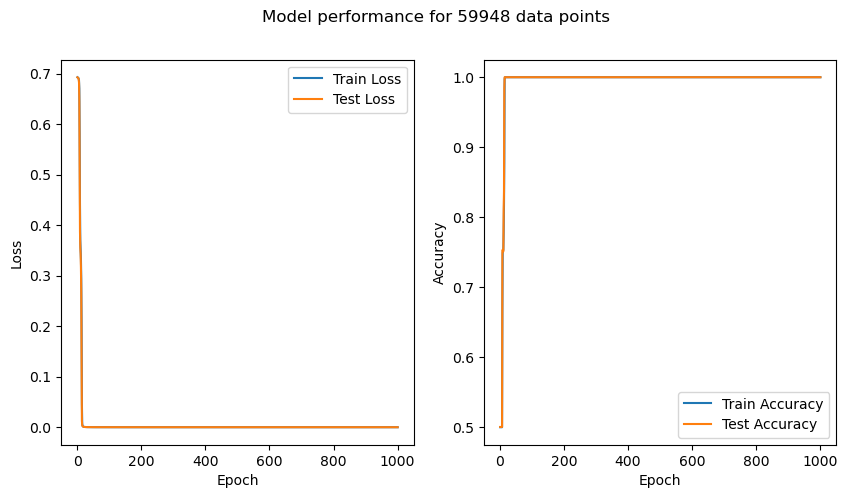

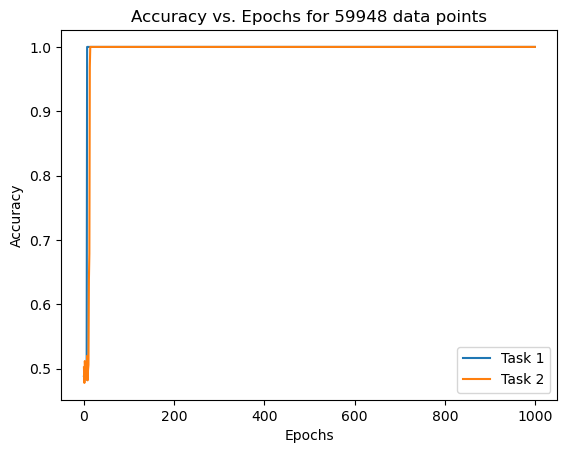

tasks_dict =  dict_items([('01001101', [7, 11, 10]), ('11111110', [8, 2, 4])])
100000 samples


 10%|▉         | 97/1000 [49:17<7:38:50, 30.49s/it]   


KeyboardInterrupt: 

In [24]:
# Parameters
n_tasks = 2 # number of tasks created
len_taskcode = 8 # length of the code defining the task. This will go at the beginning of each entry
num_checks = 3  # Length of the associated integer list for each task. Must be less than len_message
len_message = 12  # Maximum integer value in the associated integer list
num_samples_list = np.logspace(start=3, stop=5, num=10, base=10, dtype=int) # number of samples created in the dataset
#num_samples_list = [202]
samples_per_task = 1000
# Define hyperparameters
input_size = len_taskcode + len_message
output_size = 1
learning_rate = 0.005
batch_size = 32
num_epochs = 1000
test_frac = 0.2
num_layers = 6
hidden_size = 32

for num_samples in num_samples_list:
    # Train the model
    tasks_dict = generate_dict(n_tasks, len_taskcode, num_checks, len_message) # Moved intentionally earlier
    print("tasks_dict = ", tasks_dict.items())
    [data, value] = generate_dataset(tasks_dict, num_samples)

    # Create a dataframe for training
    df = pd.DataFrame(np.concatenate((data, value.reshape(-1, 1)), axis=1), columns=[f'feature_{i}' for i in range(len_taskcode + len_message)] + ['target'])

    # Split the data into training and test sets
    train_df, test_df = train_test_split(df, test_size=test_frac)

    # Create instances of the neural network
    model = NeuralNetwork(input_size, output_size, num_layers, hidden_size)

    # Define loss function and optimizer (same as before)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Create DataLoaders for the training and test data
    train_dataset = CustomDataset(train_df)
    test_dataset = CustomDataset(test_df)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    train_loss_list = np.empty(num_epochs)
    test_loss_list = np.empty(num_epochs)

    train_accuracy_list = np.empty(num_epochs)
    test_accuracy_list = np.empty(num_epochs)

    accuracy_array = np.zeros((n_tasks, num_epochs)) # such that each row is the accuracy for that specific task over all epochs

    print(f'{num_samples} samples')

    for epoch in tqdm(range(num_epochs)):
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        model.train()

        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels.unsqueeze(1))

            # Compute predictions
            predictions = (outputs >= 0.5).squeeze().long()

            # Compute accuracy
            train_correct += (predictions == labels).sum().item()
            train_total += labels.size(0)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        # Calculate average train loss
        train_loss = train_loss / len(train_dataset)
        # Calculate average train accuracy
        train_accuracy = train_correct / train_total

        # Evaluate the model on the test set
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                # Compute predictions
                predictions = (outputs >= 0.5).squeeze().long()

                # Compute accuracy
                test_correct += (predictions == labels).sum().item()
                test_total += labels.size(0)

                loss = criterion(outputs, labels.unsqueeze(1))
                test_loss += loss.item() * inputs.size(0)

            # Calculate average test loss
            test_loss = test_loss / len(test_dataset)

        # Calculate average test accuracy
        test_accuracy = test_correct / test_total

        # Update the loss lists
        train_loss_list[epoch] = train_loss
        test_loss_list[epoch] = test_loss

        train_accuracy_list[epoch] = train_accuracy
        test_accuracy_list[epoch] = test_accuracy

        # Find accuracy data
        tasks_list = list(tasks_dict.keys())
        for i in range(n_tasks):
          task_code = tasks_list[i]
          #print(f"task_code = ", task_code)
          [data_per_task, value_per_task] = generate_dataset_for_task(task_code, samples_per_task)
          #print(data_per_task)
          df_per_task = pd.DataFrame(np.concatenate((data_per_task, value_per_task.reshape(-1, 1)), axis=1), columns=[f'feature_{i}' for i in range(len_taskcode + len_message)] + ['target'])
          #print(df_per_task)
          dataset_per_task = CustomDataset(df_per_task)
          loader_per_task = DataLoader(dataset_per_task, batch_size=batch_size, shuffle=True)
          model.eval()
          task_correct = 0
          task_total = 0
          with torch.no_grad():
            for inputs, labels in loader_per_task:
                outputs = model(inputs)
                # Compute predictions
                predictions = (outputs >= 0.5).squeeze().long()

                # Compute accuracy
                task_correct += (predictions == labels).sum().item()
                task_total += labels.size(0)
                #print(f'inputs = ', inputs)
                #print(f'labels.size(0) = ', labels.size(0))

                #loss = criterion(outputs, labels.unsqueeze(1)) #if in future I want to calculate loss
                #test_loss += loss.item() * inputs.size(0)
            task_accuracy = task_correct / task_total
            #print(f"task_accuracy = ", task_accuracy)
            accuracy_array[(i, epoch)] = task_accuracy
        #print(f"accuracy_array = {accuracy_array} at epoch {epoch}")
        # Print epoch information
        #print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")


    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the training and test losses on the first subplot
    axs[0].plot(range(1, num_epochs+1), train_loss_list, label='Train Loss')
    axs[0].plot(range(1, num_epochs+1), test_loss_list, label='Test Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot the training and test accuracies on the second subplot
    axs[1].plot(range(1, num_epochs+1), train_accuracy_list, label='Train Accuracy')
    axs[1].plot(range(1, num_epochs+1), test_accuracy_list, label='Test Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    # Adjust the spacing between subplots
    #plt.tight_layout()
    plt.suptitle(f'Model performance for {num_samples} data points')
    # Show the subplots
    plt.show()

    # Plotting each array with its corresponding index as the label
    for i in range(n_tasks):
        plt.plot(np.arange(0, num_epochs, 1), accuracy_array[i], label='Task ' + str(i+1))

    # Add plot labels and legend
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Epochs for {num_samples} data points')
    plt.legend()

    # Show the plot
    plt.show()
    
# Display model parameter number. If model is changed, should go into the loop
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"Total model parameters = {pytorch_total_params}")

tasks_dict =  dict_items([('01010110', [11, 7, 5]), ('01101100', [8, 6, 9]), ('10101110', [3, 8, 9])])
10000 samples


100%|██████████| 200/200 [04:22<00:00,  1.31s/it]


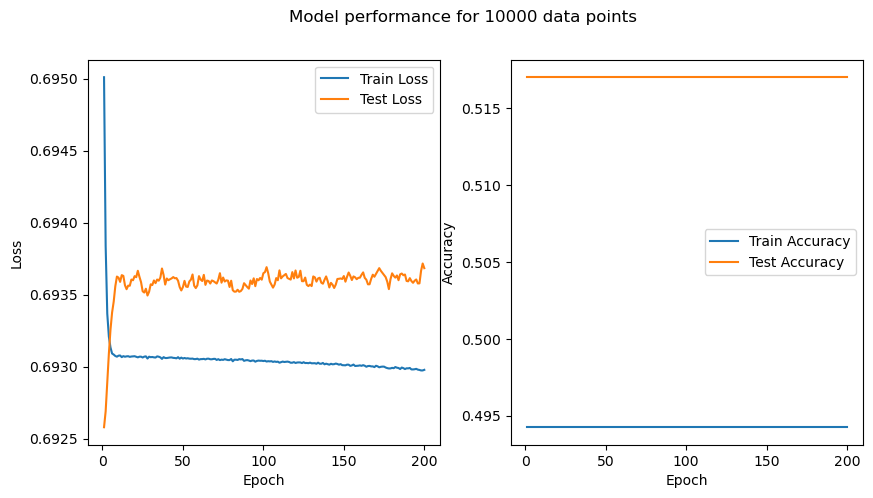

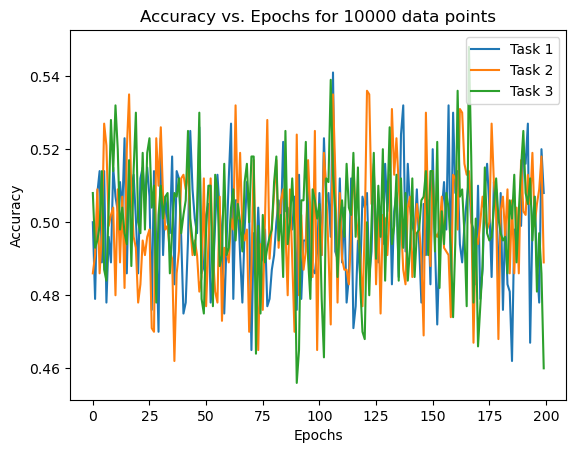

tasks_dict =  dict_items([('01010000', [7, 2, 5]), ('10110100', [6, 0, 8]), ('00101111', [2, 8, 5])])
11288 samples


100%|██████████| 200/200 [04:23<00:00,  1.32s/it]


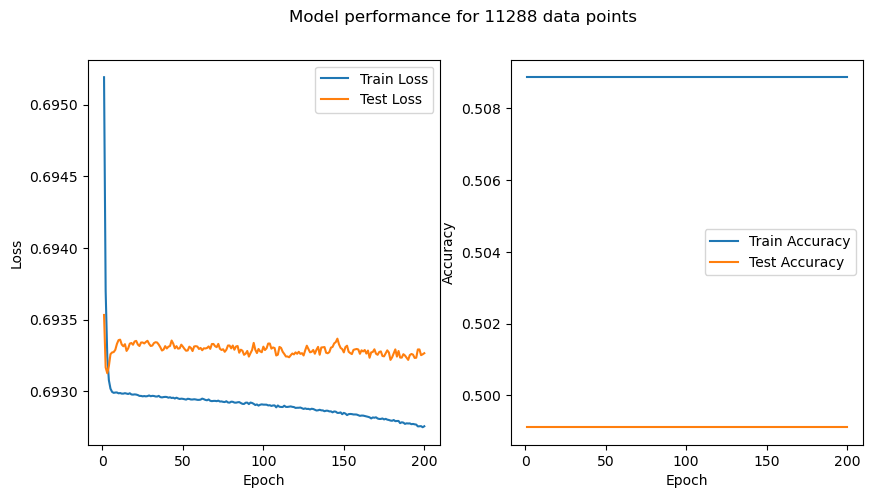

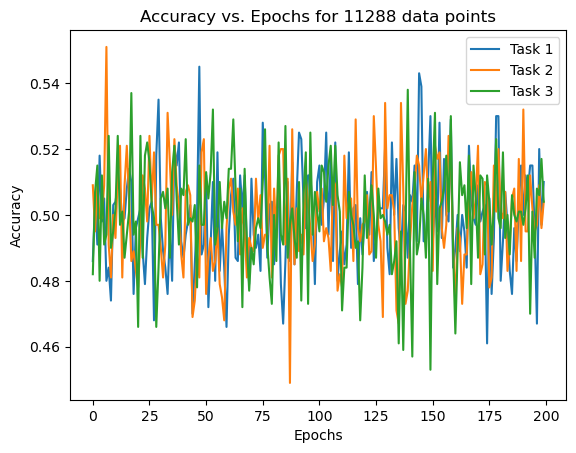

tasks_dict =  dict_items([('00111110', [4, 0, 4]), ('01010111', [5, 1, 4]), ('11100011', [11, 9, 2])])
12742 samples


100%|██████████| 200/200 [04:51<00:00,  1.46s/it]


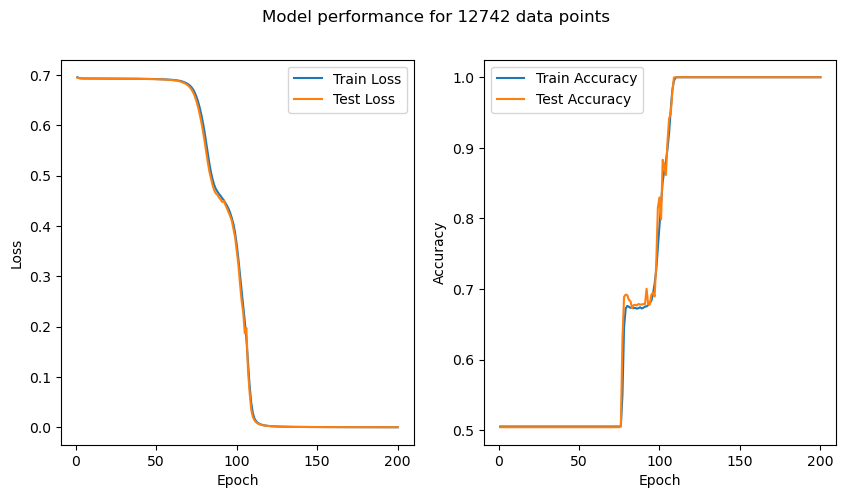

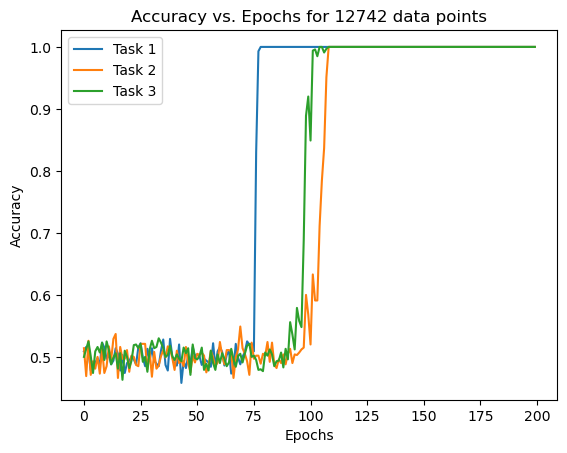

tasks_dict =  dict_items([('11010001', [10, 7, 5]), ('00001100', [4, 10, 5]), ('00001101', [6, 7, 11])])
14384 samples


100%|██████████| 200/200 [05:13<00:00,  1.57s/it]


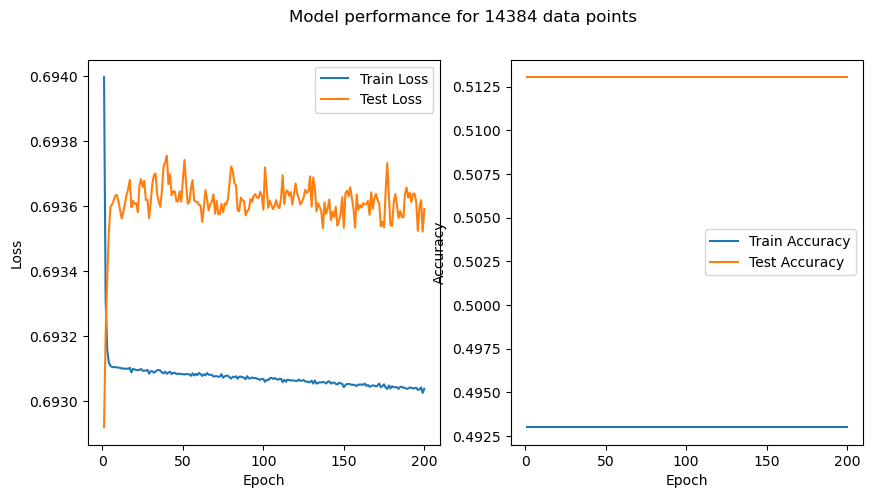

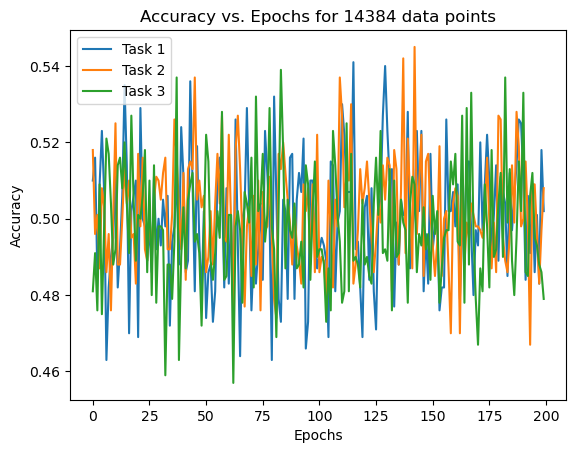

tasks_dict =  dict_items([('11011100', [9, 11, 6]), ('11101101', [2, 5, 4]), ('01110010', [1, 6, 10])])
16237 samples


100%|██████████| 200/200 [05:42<00:00,  1.71s/it]


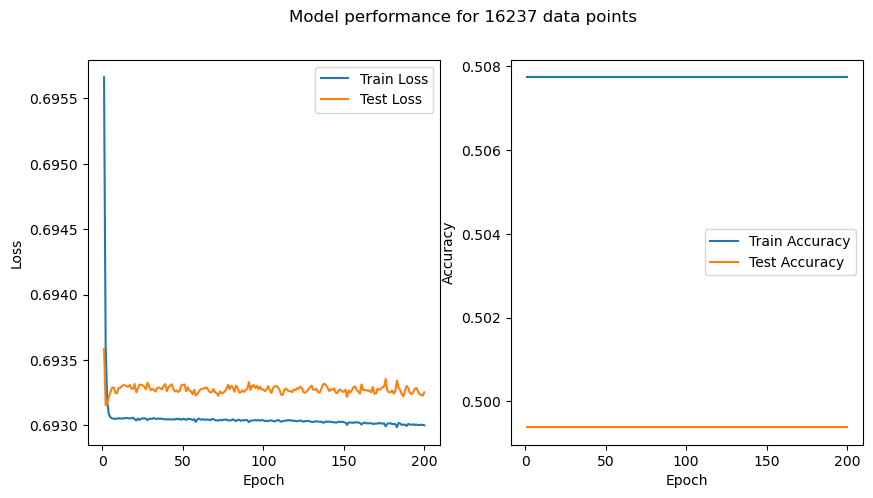

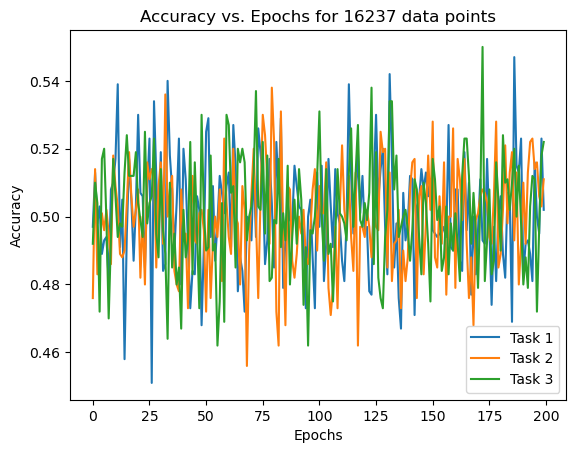

tasks_dict =  dict_items([('01000100', [2, 10, 3]), ('01111110', [3, 10, 6]), ('00110100', [2, 1, 3])])
18329 samples


100%|██████████| 200/200 [06:27<00:00,  1.94s/it]


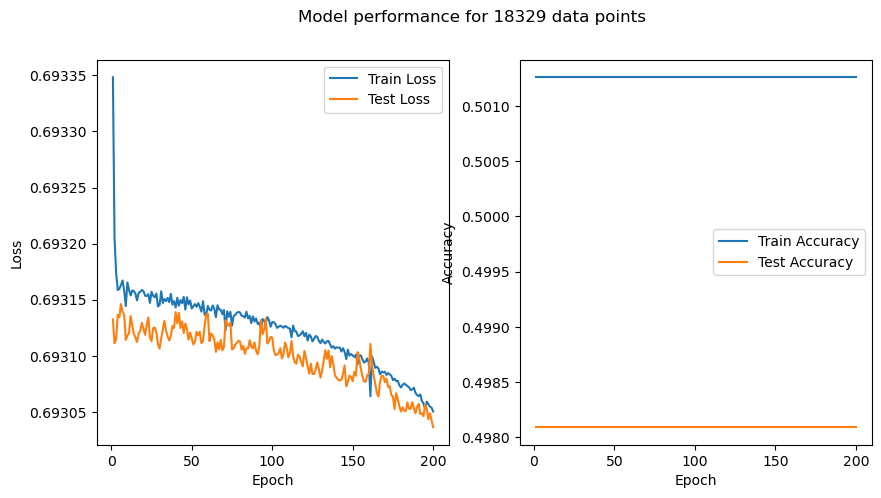

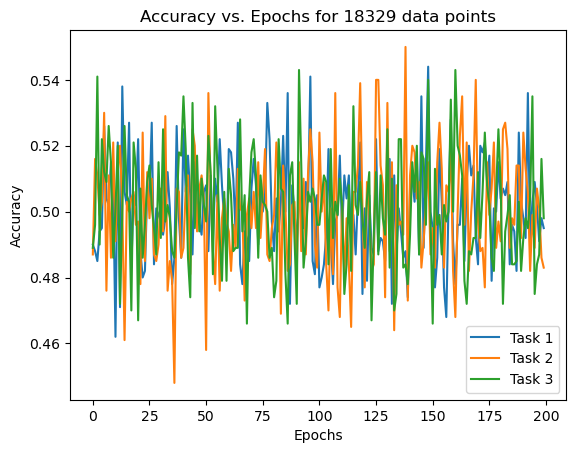

tasks_dict =  dict_items([('00000000', [1, 10, 10]), ('01110000', [3, 0, 2]), ('01100010', [5, 7, 8])])
20691 samples


100%|██████████| 200/200 [06:52<00:00,  2.06s/it]


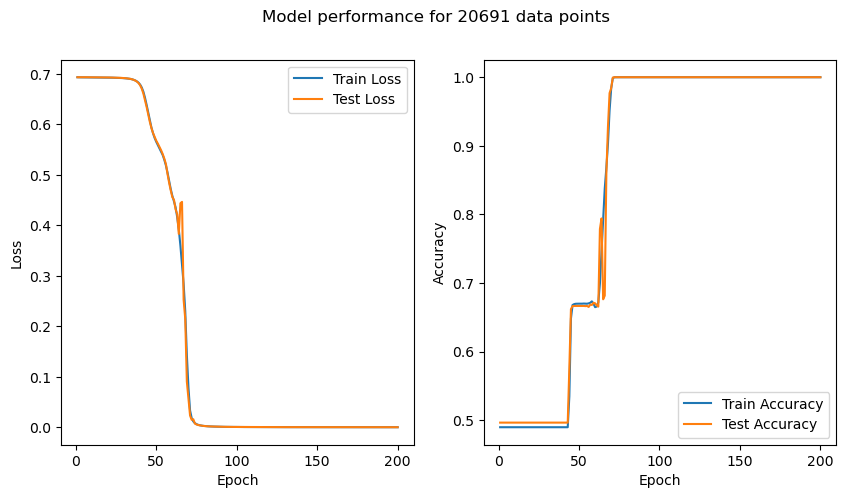

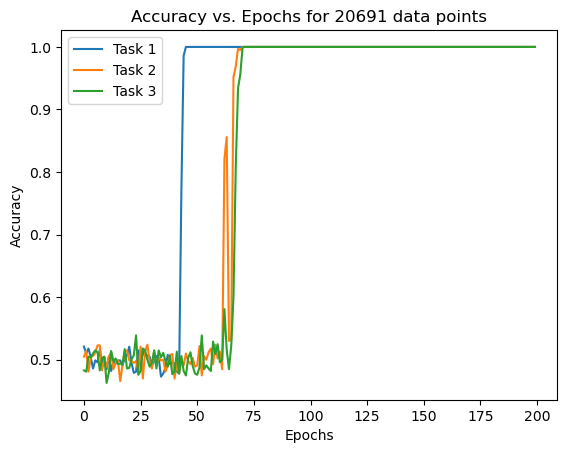

tasks_dict =  dict_items([('11011100', [4, 8, 7]), ('01011100', [8, 1, 11]), ('00000001', [9, 3, 10])])
23357 samples


100%|██████████| 200/200 [07:35<00:00,  2.28s/it]


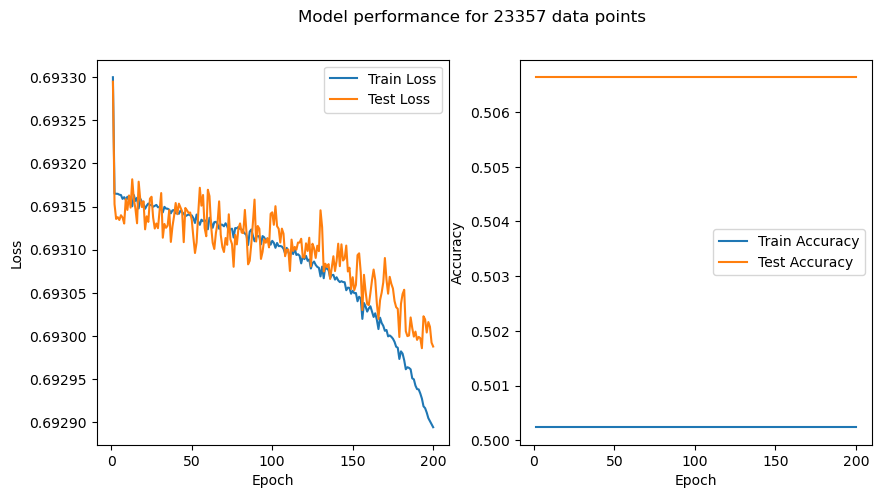

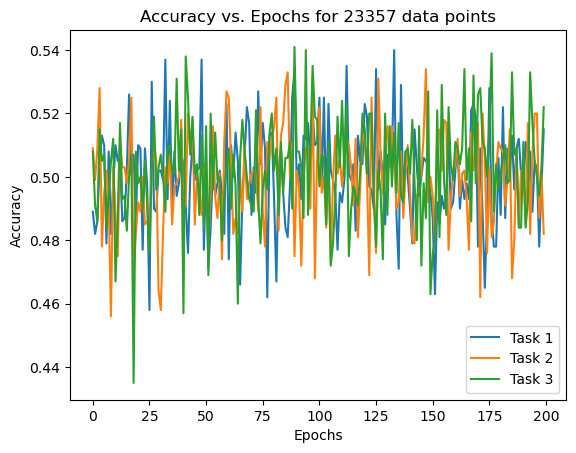

tasks_dict =  dict_items([('10010110', [1, 8, 7]), ('10011111', [1, 6, 3]), ('10011011', [3, 7, 4])])
26366 samples


100%|██████████| 200/200 [08:23<00:00,  2.52s/it]


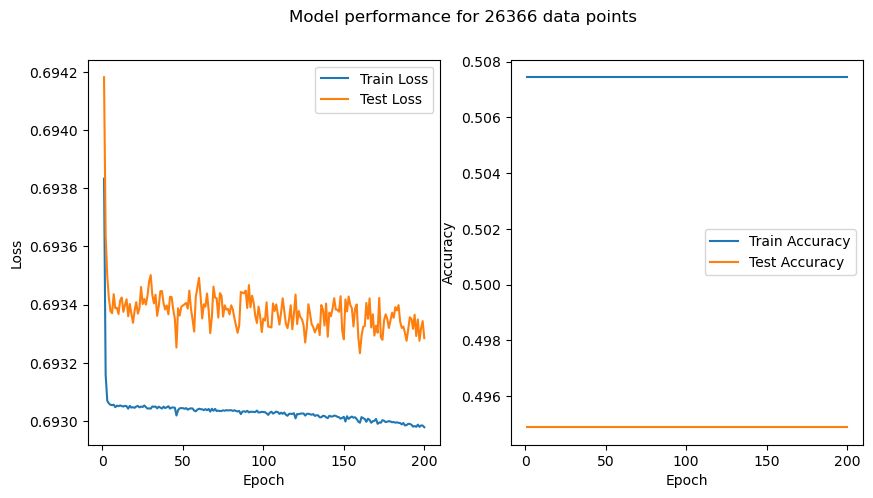

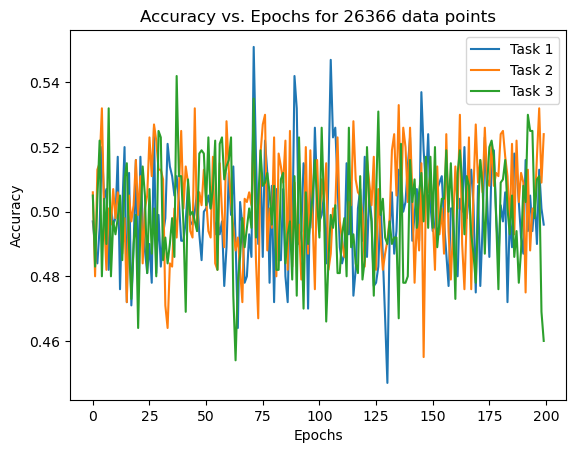

tasks_dict =  dict_items([('01100100', [1, 4, 4]), ('01100111', [0, 5, 1]), ('11101110', [0, 6, 6])])
29763 samples


100%|██████████| 200/200 [09:26<00:00,  2.83s/it]


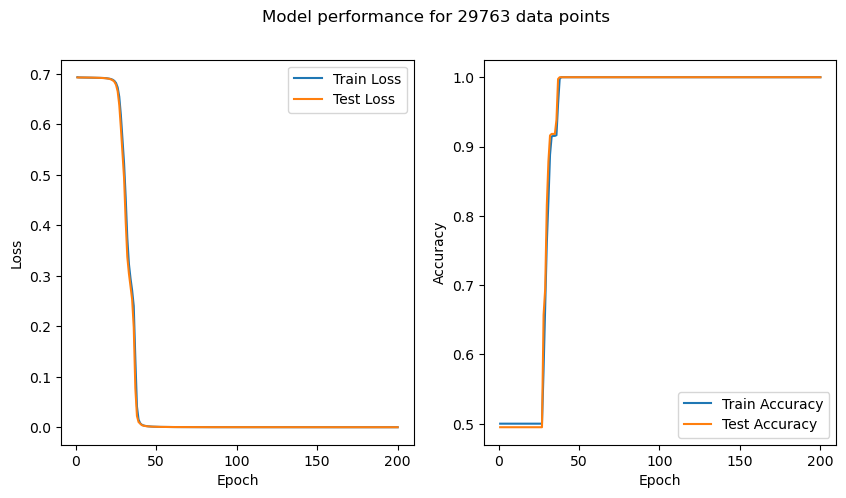

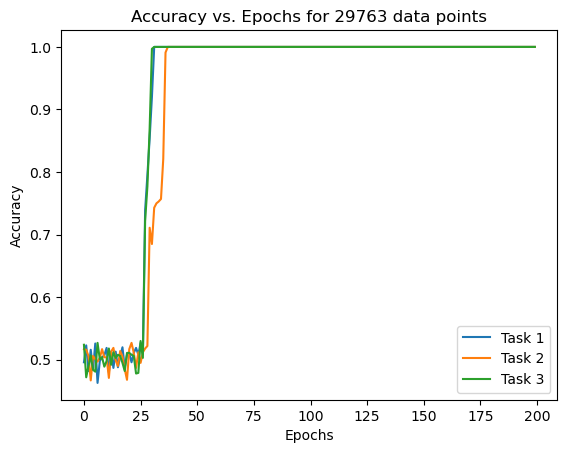

tasks_dict =  dict_items([('11101110', [8, 5, 4]), ('11001011', [6, 3, 6]), ('00001000', [7, 8, 1])])
33598 samples


100%|██████████| 200/200 [10:25<00:00,  3.13s/it]


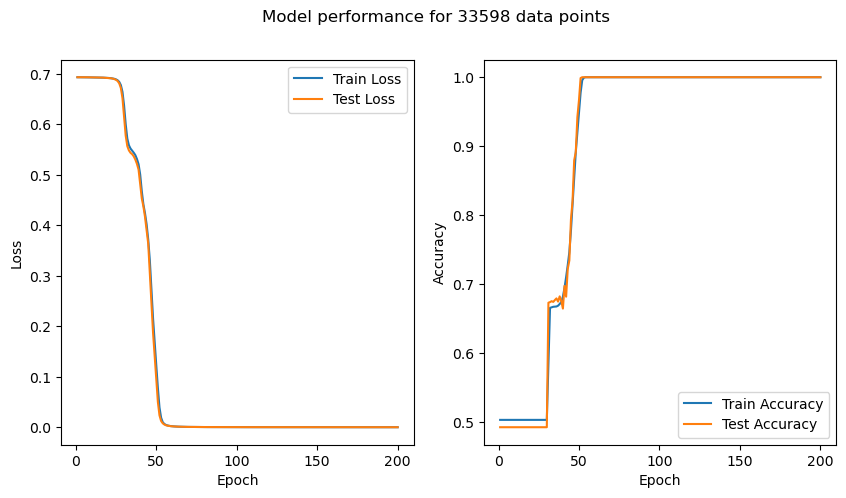

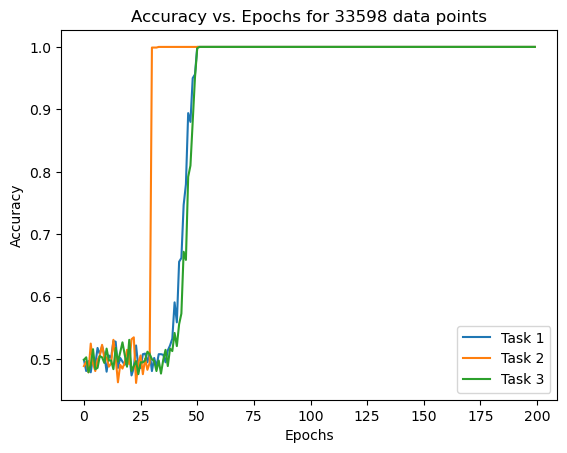

tasks_dict =  dict_items([('01101111', [2, 6, 1]), ('11010101', [10, 5, 8]), ('00110111', [5, 8, 5])])
37926 samples


100%|██████████| 200/200 [11:32<00:00,  3.46s/it]


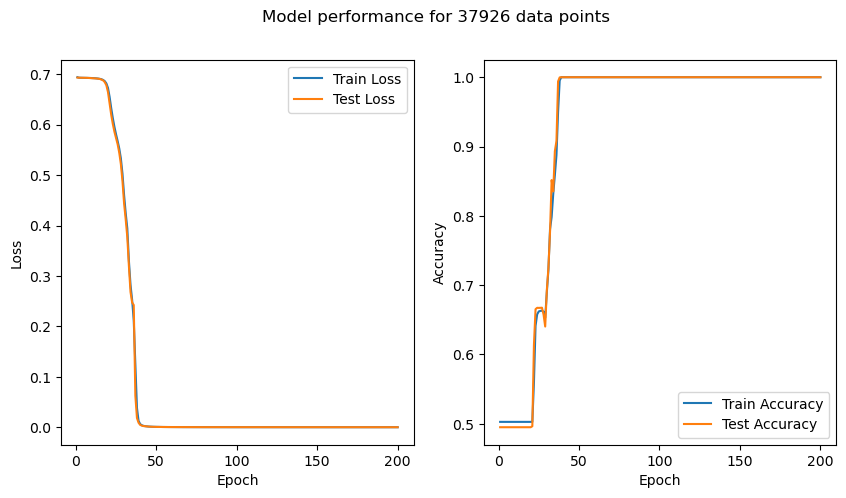

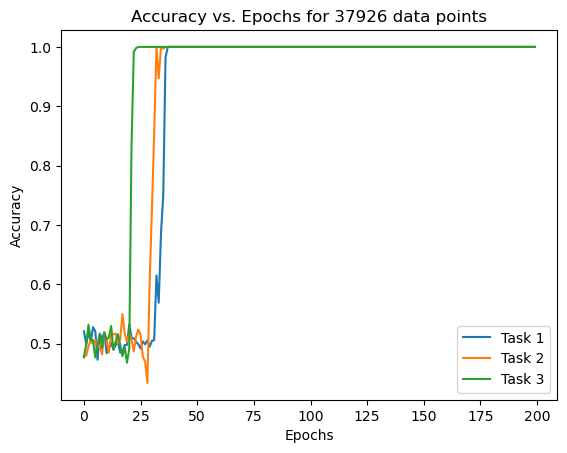

tasks_dict =  dict_items([('10010101', [8, 1, 0]), ('01011010', [10, 10, 1]), ('10001110', [1, 7, 4])])
42813 samples


100%|██████████| 200/200 [13:00<00:00,  3.90s/it]


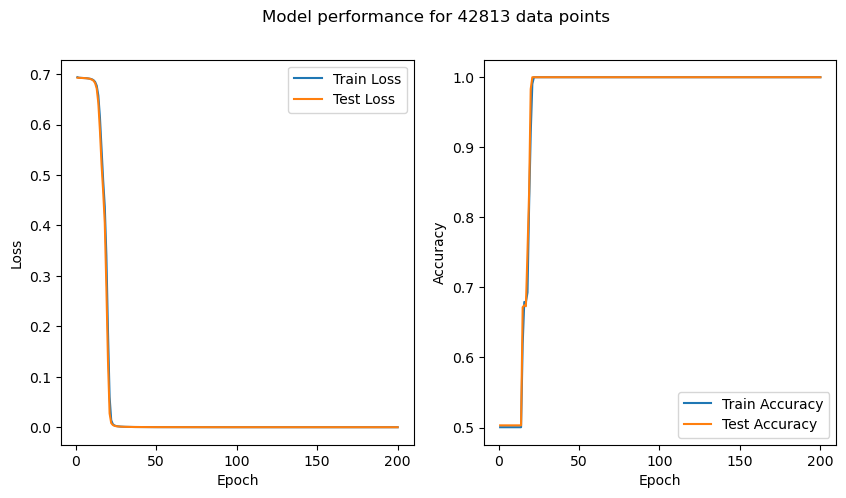

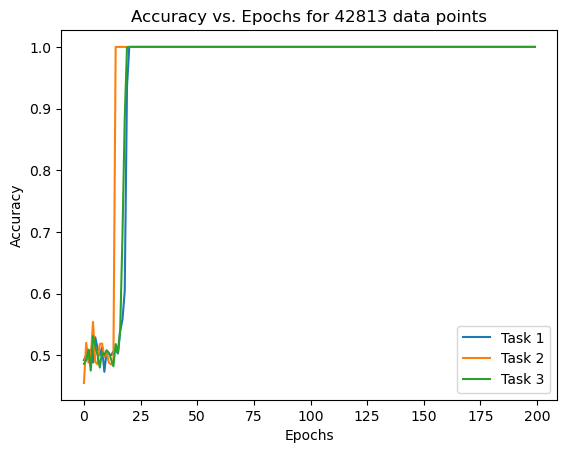

tasks_dict =  dict_items([('11110101', [0, 1, 4]), ('01010100', [0, 11, 3]), ('01011100', [9, 7, 1])])
48329 samples


100%|██████████| 200/200 [14:18<00:00,  4.29s/it]


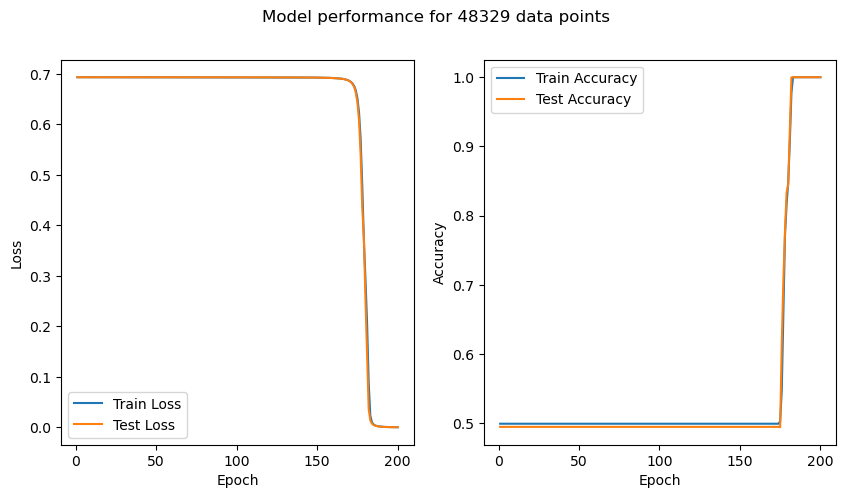

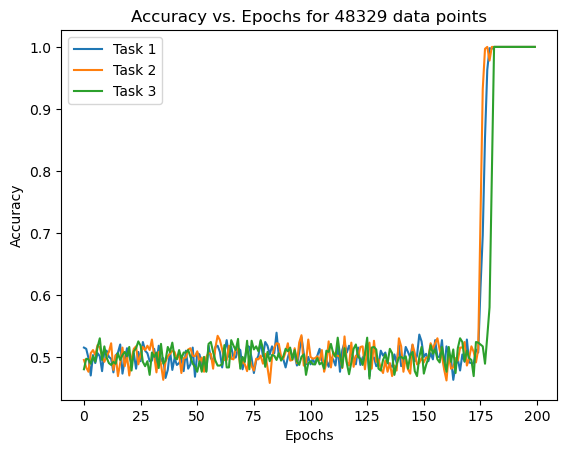

tasks_dict =  dict_items([('01111111', [9, 3, 4]), ('01111100', [5, 9, 7]), ('10000011', [8, 10, 0])])
54555 samples


100%|██████████| 200/200 [16:01<00:00,  4.81s/it]


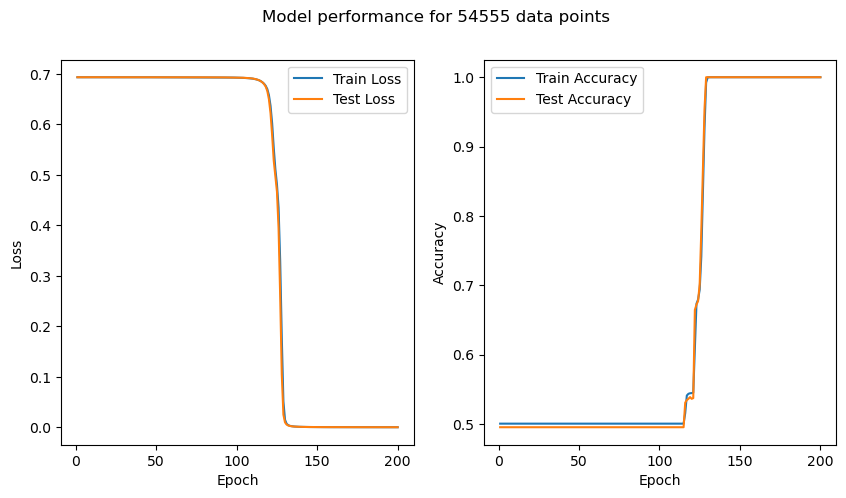

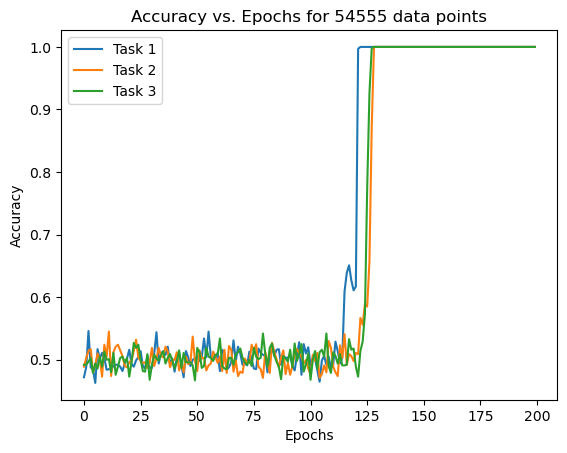

tasks_dict =  dict_items([('10010011', [8, 5, 6]), ('00100110', [6, 6, 8]), ('11110100', [4, 9, 9])])
61584 samples


100%|██████████| 200/200 [17:50<00:00,  5.35s/it]


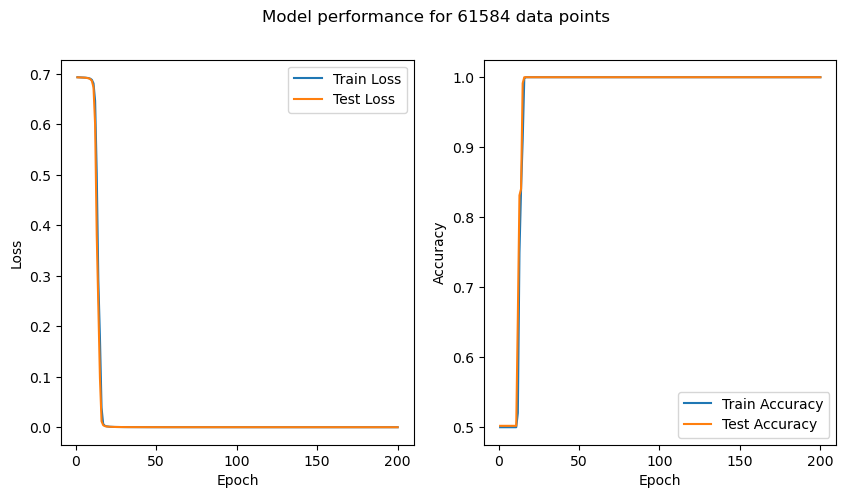

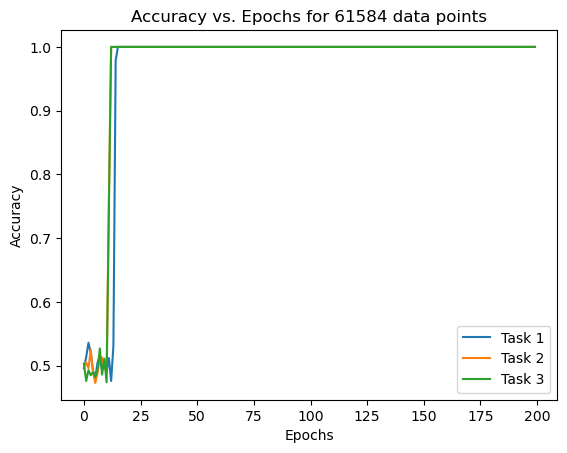

tasks_dict =  dict_items([('01001000', [1, 7, 10]), ('10010110', [9, 3, 7]), ('01101110', [2, 3, 1])])
69519 samples


100%|██████████| 200/200 [20:01<00:00,  6.01s/it]


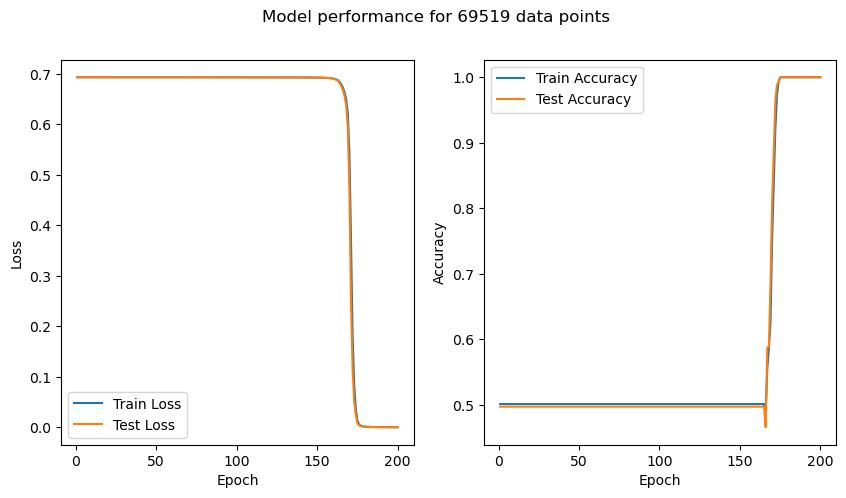

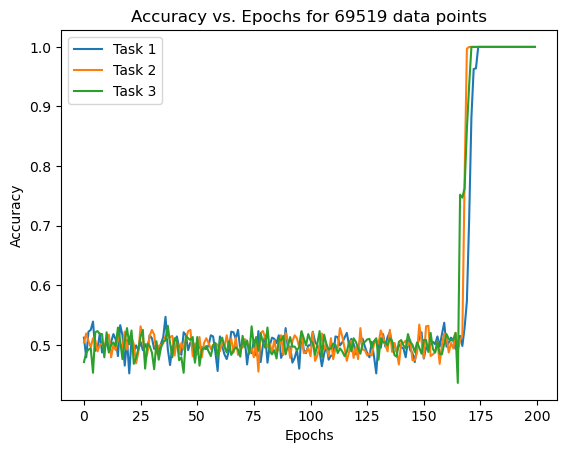

tasks_dict =  dict_items([('01000110', [0, 4, 3]), ('01110101', [0, 11, 9]), ('01100111', [4, 8, 7])])
78475 samples


100%|██████████| 200/200 [22:25<00:00,  6.73s/it]


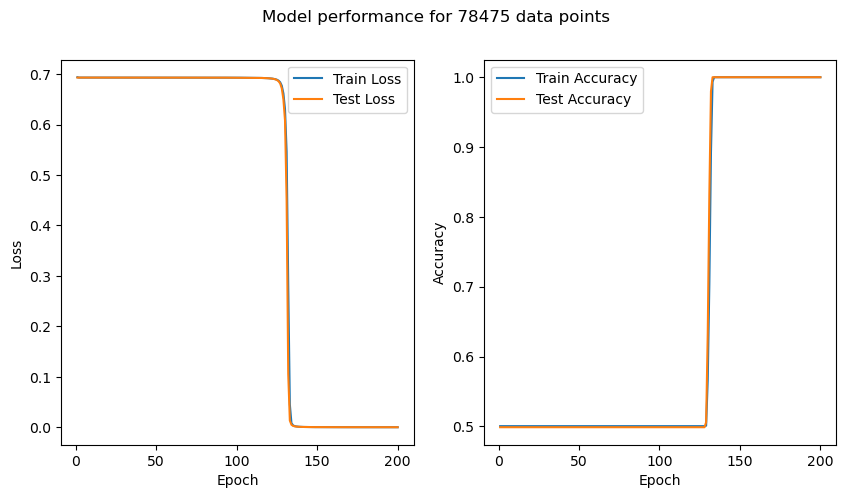

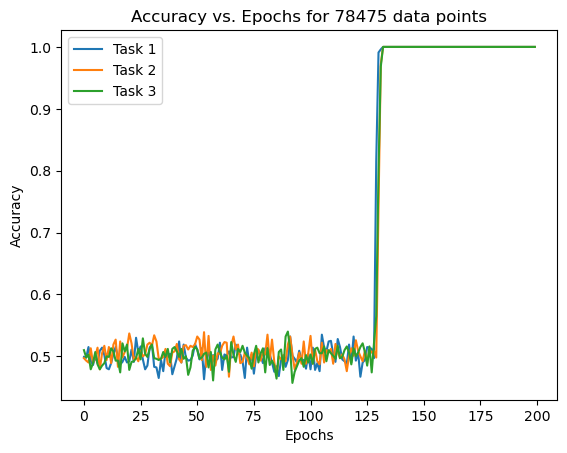

tasks_dict =  dict_items([('00011011', [0, 3, 10]), ('00001110', [7, 2, 4]), ('11000100', [3, 0, 3])])
88586 samples


100%|██████████| 200/200 [25:00<00:00,  7.50s/it]


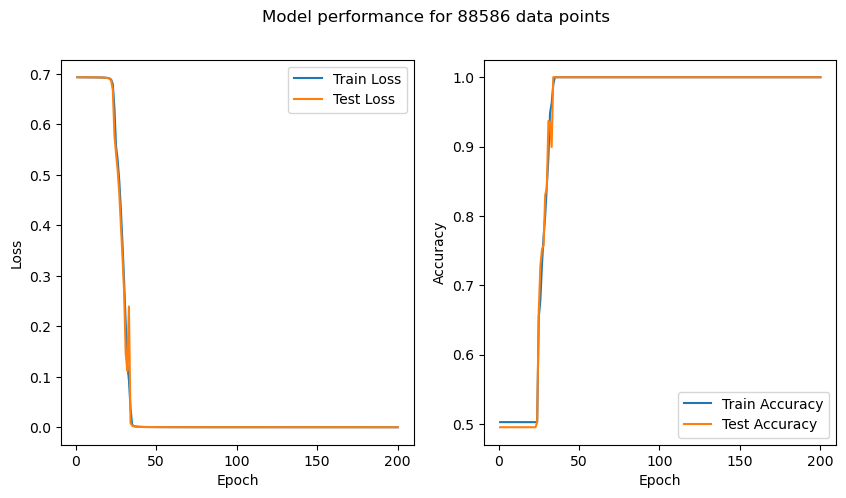

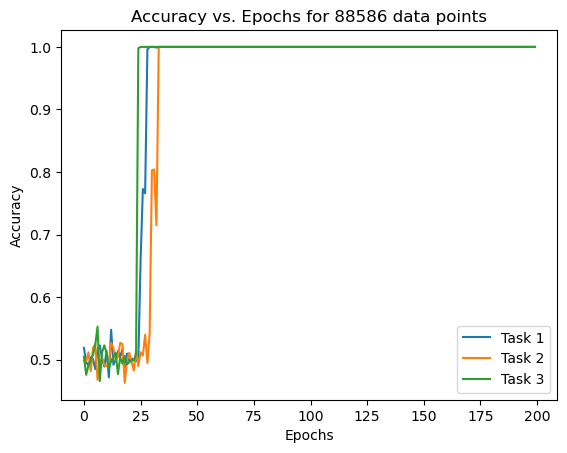

tasks_dict =  dict_items([('10010011', [7, 8, 0]), ('00011100', [7, 1, 11]), ('11000111', [6, 2, 2])])
100000 samples


100%|██████████| 200/200 [28:05<00:00,  8.43s/it]


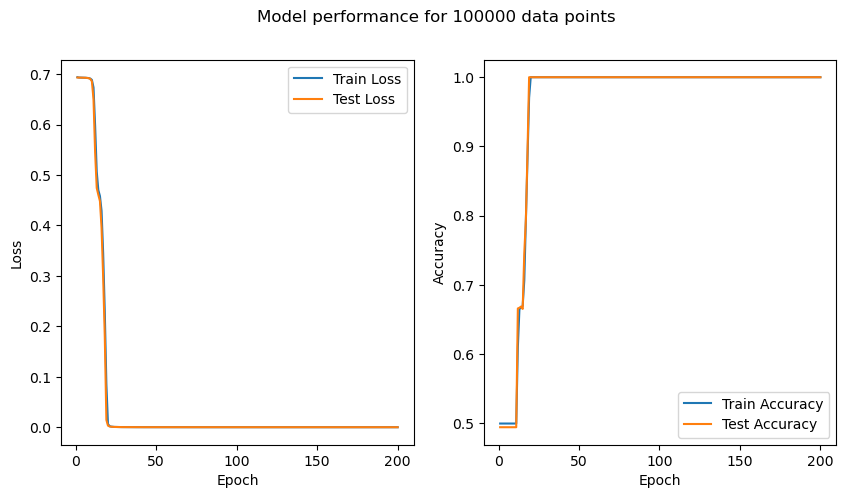

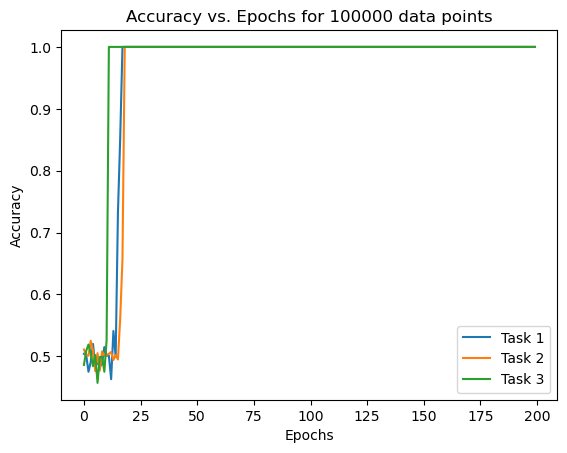

Total model parameters = 4929


In [25]:
# Parameters
n_tasks = 3 # number of tasks created
len_taskcode = 8 # length of the code defining the task. This will go at the beginning of each entry
num_checks = 3  # Length of the associated integer list for each task. Must be less than len_message
len_message = 12  # Maximum integer value in the associated integer list
num_samples_list = np.logspace(start=4, stop=5, num=20, base=10, dtype=int) # number of samples created in the dataset
#num_samples_list = [202]
samples_per_task = 1000
# Define hyperparameters
input_size = len_taskcode + len_message
output_size = 1
learning_rate = 0.005
batch_size = 32
num_epochs = 200
test_frac = 0.2
num_layers = 6
hidden_size = 32

for num_samples in num_samples_list:
    # Train the model
    tasks_dict = generate_dict(n_tasks, len_taskcode, num_checks, len_message) # Moved intentionally earlier
    print("tasks_dict = ", tasks_dict.items())
    [data, value] = generate_dataset(tasks_dict, num_samples)

    # Create a dataframe for training
    df = pd.DataFrame(np.concatenate((data, value.reshape(-1, 1)), axis=1), columns=[f'feature_{i}' for i in range(len_taskcode + len_message)] + ['target'])

    # Split the data into training and test sets
    train_df, test_df = train_test_split(df, test_size=test_frac)

    # Create instances of the neural network
    model = NeuralNetwork(input_size, output_size, num_layers, hidden_size)

    # Define loss function and optimizer (same as before)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Create DataLoaders for the training and test data
    train_dataset = CustomDataset(train_df)
    test_dataset = CustomDataset(test_df)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    train_loss_list = np.empty(num_epochs)
    test_loss_list = np.empty(num_epochs)

    train_accuracy_list = np.empty(num_epochs)
    test_accuracy_list = np.empty(num_epochs)

    accuracy_array = np.zeros((n_tasks, num_epochs)) # such that each row is the accuracy for that specific task over all epochs

    print(f'{num_samples} samples')

    for epoch in tqdm(range(num_epochs)):
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        model.train()

        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels.unsqueeze(1))

            # Compute predictions
            predictions = (outputs >= 0.5).squeeze().long()

            # Compute accuracy
            train_correct += (predictions == labels).sum().item()
            train_total += labels.size(0)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        # Calculate average train loss
        train_loss = train_loss / len(train_dataset)
        # Calculate average train accuracy
        train_accuracy = train_correct / train_total

        # Evaluate the model on the test set
        model.eval()
        test_loss = 0.0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                # Compute predictions
                predictions = (outputs >= 0.5).squeeze().long()

                # Compute accuracy
                test_correct += (predictions == labels).sum().item()
                test_total += labels.size(0)

                loss = criterion(outputs, labels.unsqueeze(1))
                test_loss += loss.item() * inputs.size(0)

            # Calculate average test loss
            test_loss = test_loss / len(test_dataset)

        # Calculate average test accuracy
        test_accuracy = test_correct / test_total

        # Update the loss lists
        train_loss_list[epoch] = train_loss
        test_loss_list[epoch] = test_loss

        train_accuracy_list[epoch] = train_accuracy
        test_accuracy_list[epoch] = test_accuracy

        # Find accuracy data
        tasks_list = list(tasks_dict.keys())
        for i in range(n_tasks):
          task_code = tasks_list[i]
          #print(f"task_code = ", task_code)
          [data_per_task, value_per_task] = generate_dataset_for_task(task_code, samples_per_task)
          #print(data_per_task)
          df_per_task = pd.DataFrame(np.concatenate((data_per_task, value_per_task.reshape(-1, 1)), axis=1), columns=[f'feature_{i}' for i in range(len_taskcode + len_message)] + ['target'])
          #print(df_per_task)
          dataset_per_task = CustomDataset(df_per_task)
          loader_per_task = DataLoader(dataset_per_task, batch_size=batch_size, shuffle=True)
          model.eval()
          task_correct = 0
          task_total = 0
          with torch.no_grad():
            for inputs, labels in loader_per_task:
                outputs = model(inputs)
                # Compute predictions
                predictions = (outputs >= 0.5).squeeze().long()

                # Compute accuracy
                task_correct += (predictions == labels).sum().item()
                task_total += labels.size(0)
                #print(f'inputs = ', inputs)
                #print(f'labels.size(0) = ', labels.size(0))

                #loss = criterion(outputs, labels.unsqueeze(1)) #if in future I want to calculate loss
                #test_loss += loss.item() * inputs.size(0)
            task_accuracy = task_correct / task_total
            #print(f"task_accuracy = ", task_accuracy)
            accuracy_array[(i, epoch)] = task_accuracy
        #print(f"accuracy_array = {accuracy_array} at epoch {epoch}")
        # Print epoch information
        #print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f}")


    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the training and test losses on the first subplot
    axs[0].plot(range(1, num_epochs+1), train_loss_list, label='Train Loss')
    axs[0].plot(range(1, num_epochs+1), test_loss_list, label='Test Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plot the training and test accuracies on the second subplot
    axs[1].plot(range(1, num_epochs+1), train_accuracy_list, label='Train Accuracy')
    axs[1].plot(range(1, num_epochs+1), test_accuracy_list, label='Test Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    # Adjust the spacing between subplots
    #plt.tight_layout()
    plt.suptitle(f'Model performance for {num_samples} data points')
    # Show the subplots
    plt.show()

    # Plotting each array with its corresponding index as the label
    for i in range(n_tasks):
        plt.plot(np.arange(0, num_epochs, 1), accuracy_array[i], label='Task ' + str(i+1))

    # Add plot labels and legend
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Epochs for {num_samples} data points')
    plt.legend()

    # Show the plot
    plt.show()
    
# Display model parameter number. If model is changed, should go into the loop
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(f"Total model parameters = {pytorch_total_params}")